In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix,roc_auc_score, recall_score

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load Data

In [107]:
df = pd.read_csv('incident_event_log.csv', na_values=['?'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [108]:
df.shape

(119998, 36)

In [9]:
df.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [10]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,sys_created_by,sys_created_at,sys_updated_by,sys_updated_at,contact_type,location,category,subcategory,u_symptom,cmdb_ci,impact,urgency,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 21,29/2/2016 01:23,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 642,29/2/2016 08:53,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 804,29/2/2016 11:29,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,Created by 6,29/2/2016 01:23,Updated by 908,5/3/2016 12:00,Phone,Location 143,Category 55,Subcategory 170,Symptom 72,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 56,NaN,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,Created by 171,29/2/2016 04:57,Updated by 746,29/2/2016 04:57,Phone,Location 165,Category 40,Subcategory 215,Symptom 471,NaN,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 89,True,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


# EDA & Preprocessing

In [ ]:
df.nunique()

number                     20769
incident_state                 9
active                         2
reassignment_count            28
reopen_count                   9
sys_mod_count                115
made_sla                       2
caller_id                   4828
opened_by                    156
opened_at                  16349
sys_created_by               149
sys_created_at              9979
sys_updated_by               714
sys_updated_at             41969
contact_type                   2
location                     202
category                      44
subcategory                  220
u_symptom                    499
cmdb_ci                       48
impact                         3
urgency                        3
priority                       4
assignment_group              72
assigned_to                  208
knowledge                      2
u_priority_confirmation        2
notify                         2
problem_id                   215
rfc                          162
vendor    

In [ ]:
df.drop_duplicates().shape

(119998, 36)

In [ ]:
df.isnull().sum()

number                          0
incident_state                  0
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              42354
sys_created_at              42354
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       64
subcategory                    97
u_symptom                   28271
cmdb_ci                    119562
impact                          0
urgency                         0
priority                        0
assignment_group            14213
assigned_to                 23030
knowledge                       0
u_priority_confirmation         0
notify                          0
problem_id                 118061
rfc           

In [109]:
# Dropping as these columns have most null values
df.drop(columns=['cmdb_ci', 'problem_id', 'rfc', 'vendor', 'caused_by'], inplace=True)

In [110]:
# Dropping as these columns doesn't give any value
df.drop(columns=['caller_id' ,'sys_created_by', 'sys_created_at'], inplace=True)

In [111]:
df.shape

(119998, 28)

In [ ]:
df_incident = pd.DataFrame(df.groupby('number')['number'].count())

In [ ]:
df_incident.describe()

,number
count,20769.000000
mean,5.777746
std,3.745015
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,58.000000


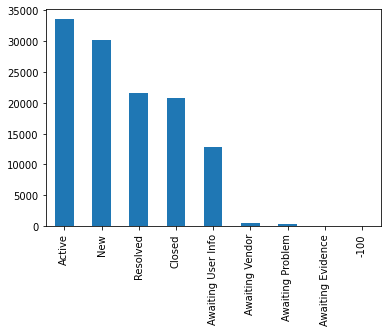

In [114]:
df['incident_state'].value_counts().plot(kind='bar')

In [ ]:
df['incident_state'].value_counts()

Active                33582
New                   30229
Resolved              21500
Closed                20825
Awaiting User Info    12884
Awaiting Vendor         557
Awaiting Problem        400
Awaiting Evidence        19
-100                      2
Name: incident_state, dtype: int64

In [112]:
df[df['active']==False]['incident_state'].value_counts()

Closed      20825
Resolved        1
Name: incident_state, dtype: int64

In [113]:
### Column active is highly correlated to incident_state. So dropping it
df.drop(columns=['active'], inplace=True)

In [ ]:
df['made_sla'].value_counts()

True     111738
False      8260
Name: made_sla, dtype: int64

In [ ]:
df['category'].value_counts()

Category 26    16291
Category 53    14033
Category 42    13007
Category 46    10846
Category 23     6459
Category 32     6187
Category 9      6146
Category 37     5515
Category 57     4858
Category 20     4773
Category 61     4477
Category 24     3953
Category 34     3570
Category 40     3467
Category 45     3271
Category 51     2245
Category 28     1945
Category 35     1822
Category 44     1584
Category 19     1314
Category 13      941
Category 55      801
Category 43      647
Category 17      455
Category 22      399
Category 38      232
Category 8       226
Category 7       156
Category 63       78
Category 56       55
Category 47       50
Category 41       36
Category 62       25
Category 54       17
Category 31       15
Category 30       15
Category 25        6
Category 4         5
Category 15        3
Category 27        2
Category 49        2
Category 29        2
Category 36        2
Category 3         1
Name: category, dtype: int64

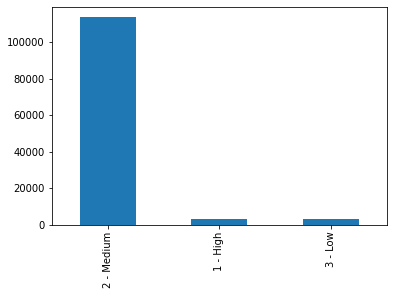

In [148]:
df['urgency'].value_counts().plot(kind='bar')

In [ ]:
df['impact'].value_counts()

2 - Medium    113691
3 - Low         3418
1 - High        2889
Name: impact, dtype: int64

In [ ]:
df['urgency'].value_counts()

2 - Medium    113550
1 - High        3303
3 - Low         3145
Name: urgency, dtype: int64

In [ ]:
df['priority'].value_counts()

3 - Moderate    112115
4 - Low           3549
2 - High          2499
1 - Critical      1835
Name: priority, dtype: int64

In [124]:
print(df[df['urgency']=='3 - Low']['priority'].value_counts())
print(df[df['urgency']=='1 - High']['priority'].value_counts())

4 - Low    3145
Name: priority, dtype: int64
1 - Critical    1835
2 - High        1445
3 - Moderate      23
Name: priority, dtype: int64


In [125]:
### Columns urgency and priority are highly correlated. So dropping priority and u_priority_confirmation columns
df.drop(columns=['priority','u_priority_confirmation'], inplace=True)

In [ ]:
df['knowledge'].value_counts()

False    94664
True     25334
Name: knowledge, dtype: int64

In [ ]:
df['notify'].value_counts()

Do Not Notify    119879
Send Email          119
Name: notify, dtype: int64

In [137]:
df['opened_at'] = pd.to_datetime(df['opened_at'], dayfirst=True)
df['resolved_at'] = pd.to_datetime(df['resolved_at'], dayfirst=True)
df['sys_updated_at'] = pd.to_datetime(df['sys_updated_at'], dayfirst=True)
df['closed_at'] = pd.to_datetime(df['closed_at'], dayfirst=True)

In [138]:
df['sys_updated_time'] = pd.to_timedelta(df['sys_updated_at'] - df['opened_at'])
df['resolution_time'] = pd.to_timedelta(df['resolved_at'] - df['opened_at'])
df['close_time'] = pd.to_timedelta(df['closed_at'] - df['resolved_at'])

In [139]:
# Converting to numeric form of days
df['sys_updated_days'] = df['sys_updated_time']/np.timedelta64(1,'D')
df['resolution_days'] = df['resolution_time']/np.timedelta64(1,'D')
df['close_days'] = df['close_time']/np.timedelta64(1,'D')

In [143]:
df['sys_updated_time'].describe(), df['resolution_time'].describe(), df['close_time'].describe()

(count                        119998
 mean      6 days 18:13:15.289754832
 std      18 days 11:40:08.227624249
 min               -1 days +21:33:00
 25%                 0 days 00:17:00
 50%                 1 days 01:48:00
 75%                 6 days 03:45:45
 max               341 days 06:37:00
 Name: sys_updated_time, dtype: object, count                        117137
 mean     11 days 16:13:41.364897537
 std      27 days 18:12:45.906407323
 min                 0 days 00:00:00
 25%                 0 days 05:40:00
 50%                 3 days 10:56:00
 75%                11 days 09:22:00
 max               336 days 06:10:00
 Name: resolution_time, dtype: object, count                       117137
 mean     6 days 05:58:46.527570289
 std      5 days 17:08:36.406066792
 min                0 days 00:00:00
 25%                5 days 00:16:00
 50%                5 days 00:35:00
 75%                5 days 00:53:00
 max              243 days 19:39:00
 Name: close_time, dtype: object)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


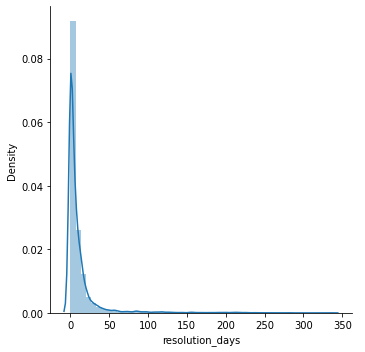

In [136]:
# sns.FacetGrid(df, hue='urgency', size=5).map(sns.distplot, "resolution_days").add_legend();
# plt.show()
sns.FacetGrid(df, size=5).map(sns.distplot, "resolution_days").add_legend();
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


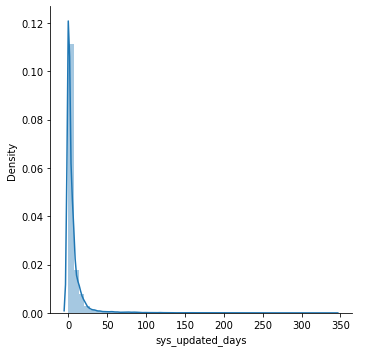

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


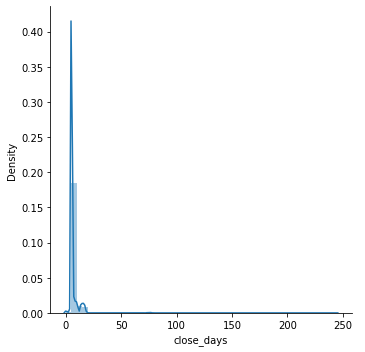

In [140]:
sns.FacetGrid(df, size=5).map(sns.distplot, "sys_updated_days").add_legend();
plt.show()
sns.FacetGrid(df, size=5).map(sns.distplot, "close_days").add_legend();
plt.show()

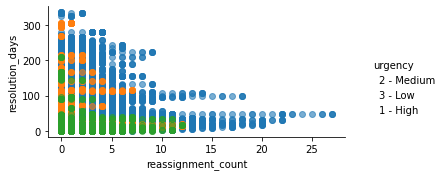

In [210]:
g = sns.PairGrid(df, y_vars = ['resolution_days'], x_vars = ['reassignment_count'], hue = 'urgency', aspect=2).add_legend()
ax = g.map(plt.scatter, alpha=0.6)

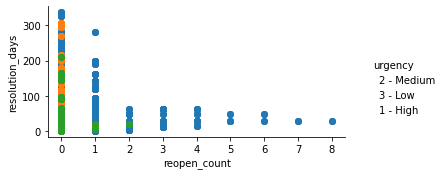

In [211]:
g = sns.PairGrid(df, y_vars = ['resolution_days'], x_vars = ['reopen_count'], hue = 'urgency', aspect=2).add_legend()
ax = g.map(plt.scatter, alpha=0.6)

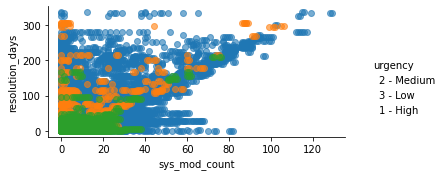

In [212]:
g = sns.PairGrid(df, y_vars = ['resolution_days'], x_vars = ['sys_mod_count'], hue = 'urgency', aspect=2).add_legend()
ax = g.map(plt.scatter, alpha=0.6)

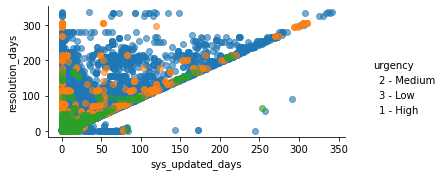

In [213]:
g = sns.PairGrid(df, y_vars = ['resolution_days'], x_vars = ['sys_updated_days'], hue = 'urgency', aspect=2).add_legend()
ax = g.map(plt.scatter, alpha=0.6)

 sys_updated_days and sys_mod_count are proportional to resolution days

In [144]:
print(df[df['urgency'] == '1 - High']['resolution_time'].describe())
print(df[df['urgency'] == '2 - Medium']['resolution_time'].describe())
print(df[df['urgency'] == '3 - Low']['resolution_time'].describe())

count                          3303
mean      9 days 14:05:53.969118982
std      19 days 05:15:43.968155115
min                 0 days 00:03:00
25%                 0 days 19:41:00
50%                 3 days 22:08:00
75%                12 days 01:43:00
max               210 days 16:29:00
Name: resolution_time, dtype: object
count                        110869
mean     11 days 13:40:13.819011665
std      27 days 09:18:32.695428875
min                 0 days 00:00:00
25%                 0 days 05:35:00
50%                 3 days 10:13:00
75%                11 days 05:47:00
max               336 days 06:10:00
Name: resolution_time, dtype: object
count                          2965
mean     17 days 23:42:35.332209106
std      44 days 00:34:34.200277899
min                 0 days 00:00:00
25%                 0 days 02:06:00
50%                 3 days 05:26:00
75%                13 days 11:47:00
max               304 days 20:27:00
Name: resolution_time, dtype: object


In [145]:
### High urgency incidents take average of 9 days to resolve where as Medium urgent incidents take average of 11 days 
### and low urgent take 17 days to resolve the issue.

In [146]:
print(df[df['urgency'] == '1 - High']['close_time'].describe())

count                         3303
mean     5 days 23:38:57.329700272
std      8 days 10:39:35.075619035
min                0 days 00:00:00
25%                5 days 00:12:00
50%                5 days 00:32:00
75%                5 days 00:49:00
max              187 days 08:45:00
Name: close_time, dtype: object


# 3. Predictive Model for resolution time

In [151]:
df_res = df[['incident_state','reassignment_count','reopen_count','sys_mod_count','impact','urgency','category',
             'knowledge','sys_updated_days','resolution_days']]

In [152]:
df_res.shape

(119998, 10)

In [153]:
df_res.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df_res.shape

(117073, 10)

In [155]:
dic = {'Awaiting User Info':'other','Awaiting Vendor': 'other','Awaiting Problem':'other','Awaiting Evidence':'other','-100':'other'}
df_res['incident_state'].replace(dic, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [156]:
df_res['category'].value_counts().tail(26).sum()/df_res['category'].value_counts().sum()

0.07448344195501952

In [157]:
## Cumulative frequency of last 26 categories summing to nearly 5% of total frequency. So combining them all and renamng as other category
dic3 = dict()
for i in df_res['category'].value_counts().tail(26).keys():
    dic3[i] = 'other'
# dic3
df_res['category'].replace(dic3, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [158]:
df_res2 = pd.get_dummies(df_res, columns=['incident_state','impact','urgency','knowledge','category'], drop_first=True)

In [159]:
df_res2.shape

(117073, 31)

In [160]:
df_res2.head(5)

,reassignment_count,reopen_count,sys_mod_count,sys_updated_days,resolution_days,incident_state_Closed,incident_state_New,incident_state_Resolved,incident_state_other,impact_2 - Medium,impact_3 - Low,urgency_2 - Medium,urgency_3 - Low,knowledge_True,category_Category 23,category_Category 24,category_Category 26,category_Category 28,category_Category 32,category_Category 34,category_Category 37,category_Category 40,category_Category 42,category_Category 45,category_Category 46,category_Category 51,category_Category 53,category_Category 57,category_Category 61,category_Category 9,category_other
0,0,0,0,0.004861,0.425694,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,2,0.317361,0.425694,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,3,0.425694,0.425694,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,4,5.447222,0.425694,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0.011806,1.216667,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [161]:
## Split the data into X and y
X = df_res2.copy().drop("resolution_days",axis=1)
y = df_res2["resolution_days"]

In [162]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [163]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [164]:
pred_train = dtr.predict(X_train)
pred_test = dtr.predict(X_test)

In [165]:
print("Train Error:", mean_absolute_error(y_train,pred_train))
print("Test Error:",mean_absolute_error(y_test,pred_test))

Train Error: 1.6365371669937292
Test Error: 6.7758560296215204


### using Random forest regressor with Grid search

In [166]:
rfr_grid = RandomForestRegressor(n_jobs=-1, max_features='sqrt')

In [167]:
param_grid = {
    "n_estimators" : [9,63,100],
    "max_depth" : [5,10,20],
    "min_samples_leaf" : [2,4]
}
rfr_cv_grid = GridSearchCV(estimator = rfr_grid, param_grid = param_grid)

In [168]:
rfr_cv_grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [169]:
## Print best score and parameters
print(rfr_cv_grid.best_score_,rfr_cv_grid.best_params_)

0.6250806227002104 {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 63}


In [170]:
rfr_fin = RandomForestRegressor(max_depth=20,min_samples_leaf= 2, n_estimators= 63,n_jobs=-1, max_features='sqrt')
rfr_fin.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=63, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [171]:
pred_train = rfr_fin.predict(X_train)
pred_test = rfr_fin.predict(X_test)

In [172]:
print("Train Error:", mean_absolute_error(y_train,pred_train))
print("Test Error:",mean_absolute_error(y_test,pred_test))

Train Error: 5.807360302491912
Test Error: 6.464986280964878


# 4. Classification MOdel

In [180]:
df_cls = df[['incident_state','reassignment_count','reopen_count','sys_mod_count','impact','urgency',
             'knowledge','sys_updated_days','category']]

In [ ]:
dic1 = {'Awaiting User Info':'other','Awaiting Vendor': 'other','Awaiting Problem':'other','Awaiting Evidence':'other','-100':'other'}
df_cls3['incident_state'].replace(dic1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [181]:
dic2 = {'1 - High': 1, '2 - Medium': 0, '3 - Low': 0}
df_cls['urgency'].replace(dic2, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [182]:
dic3 = dict()
for i in df_cls['category'].value_counts().tail(26).keys():
    dic3[i] = 'other'
# dic3
df_cls['category'].replace(dic3, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [183]:
df_cls2 = pd.get_dummies(df_cls, columns=['incident_state','impact','knowledge','category'], drop_first=True)

In [184]:
df_cls2.head()

,reassignment_count,reopen_count,sys_mod_count,urgency,sys_updated_days,incident_state_Active,incident_state_Awaiting Evidence,incident_state_Awaiting Problem,incident_state_Awaiting User Info,incident_state_Awaiting Vendor,incident_state_Closed,incident_state_New,incident_state_Resolved,impact_2 - Medium,impact_3 - Low,knowledge_True,category_Category 23,category_Category 24,category_Category 26,category_Category 28,category_Category 32,category_Category 34,category_Category 35,category_Category 37,category_Category 40,category_Category 42,category_Category 45,category_Category 46,category_Category 51,category_Category 53,category_Category 57,category_Category 61,category_Category 9,category_other
0,0,0,0,0,0.004861,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,2,0,0.317361,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,3,0,0.425694,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,4,0,5.447222,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0.011806,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [185]:
## Split the data into X and y
X = df_cls2.copy().drop("urgency",axis=1)
y = df_cls2["urgency"]

In [186]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [187]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X_train[['reassignment_count','reopen_count','sys_mod_count','sys_updated_days']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [188]:
X_train[['reassignment_count','reopen_count','sys_mod_count','sys_updated_days']] = scaler.transform(X_train[['reassignment_count','reopen_count','sys_mod_count','sys_updated_days']])
X_test[['reassignment_count','reopen_count','sys_mod_count','sys_updated_days']] = scaler.transform(X_test[['reassignment_count','reopen_count','sys_mod_count','sys_updated_days']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [190]:
rfc_grid = RandomForestClassifier(n_jobs=-1, max_features='sqrt', class_weight='balanced')

In [191]:
param_grid = {
    "n_estimators" : [9,63,100],
    "max_depth" : [5,10,20],
    "min_samples_leaf" : [2,4]
}
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 10, scoring="roc_auc")

In [192]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              

In [193]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

0.9190175618267116 {'max_depth': 20, 'min_samples_leaf': 4, 'n_estimators': 100}


In [194]:
rfc_fin = RandomForestClassifier(max_depth = 20, min_samples_leaf= 4, n_estimators= 100,n_jobs=-1, max_features='sqrt', class_weight='balanced')
rfc_fin

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [195]:
rfc_fin.fit(X_train, y_train)
rfc_fin.score(X_train, y_train)

0.9751244817600366

In [196]:
yf_pred = rfc_fin.predict(X_test)

#### metrics used for Evaluation is roc_auc_score since it is imbalanced data

In [201]:
roc_auc_score(y_test,yf_pred),accuracy_score(y_test,yf_pred),recall_score(y_test,yf_pred)

(0.8405668643152597, 0.97225, 0.7015873015873015)

In [202]:
confusion_matrix(y_test,yf_pred)

array([[22892,   478],
       [  188,   442]])

## 5. recomendatio to reduce resolution time

In [217]:
# For incidents with resolution time more than average, re assignments to be done (reassignment count to be incresed)
# and/or incident(sys_mod_count) updated to be increased

# This can be justified as the graphs show (from EDA section), incidents with high reassignment_count and 
# sys_mod_count have resolved in less time